In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import scipy.stats as sts
from scipy.stats import geom
from random import random
from collections import Counter
from math import *
from random import *
import pandas as pd
from math import floor, log
import random

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

# Различение гипотез <a name="paragraph1"></a>

# 5.1 Геометрическое распределение 

## 5.1.1 Выбор данных

Рассмотрим две выборки с разными (но известными) параметрами. А именно, к уже сконфигурированным выборкам из распределения с параметром p = 0.5, добавим к рассмотрению выборку из распределения с параметром p = 0.8.  
Сгенерируем новые выборки размеров 10, 100, 1000, 10000 и запишем их в файлы по уже отработанной схеме моделирования. 

In [3]:
# Создание случайной величины с геометрическим распределением, зависящим
# от параметра p
p = 0.5
geom_rv = sts.geom(p)

In [4]:
#Генерация выборки объема n = 10 
for n in [10]:
    means_10_ = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_10_.append(sample)
        #print(sample)

In [6]:
#Генерация выборки объема n = 100 
for n in [100]:
    means_100_ = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_100_.append(sample)
        #print(sample)

In [7]:
#Генерация выборки объема n = 1000 
for n in [1000]:
    means_1000_ = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_1000_.append(sample)
        #print(sample)

In [8]:
#Генерация выборки объема n = 100000 
for n in [100000]:
    means_100000_ = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_100000_.append(sample)
        #print(sample)

In [9]:
#p = 0.8
print(means_10_)
#print(means_100_)
#print(means_1000_)
#print(means_100000_)

[array([2, 2, 1, 2, 3, 1, 1, 1, 5, 2]), array([3, 2, 4, 1, 3, 1, 3, 1, 1, 4]), array([2, 2, 3, 1, 1, 1, 4, 4, 1, 1]), array([3, 2, 2, 1, 1, 2, 2, 3, 1, 4]), array([1, 1, 1, 1, 1, 1, 3, 1, 8, 1])]


In [11]:
#p = 0.5
print(means_10)
#print(means_100)
#print(means_1000)
#print(means_100000)

[array([1, 3, 1, 2, 3, 1, 1, 3, 1, 4]), array([1, 1, 3, 3, 1, 1, 4, 1, 4, 2]), array([3, 1, 1, 3, 2, 1, 2, 1, 2, 2]), array([3, 1, 2, 5, 1, 1, 1, 2, 1, 2]), array([2, 2, 2, 2, 1, 1, 1, 1, 4, 1])]


## 5.1.2 Постановка задачи

$H_0: \xi \sim$ Geom $p_1$    
$H_1: \xi \sim$ Geom $p_2$

Обозначим как $X_0$ - часть пространства наблюдений такая, что если $x \in X_0$, то следует принять $H_0$, и как $Y_1$ - часть пространства наблюдений такая, что если $x \in X_1$, то следует принять $H_1$. Простым языком, если $x \in X_1$, а на самом деле истинна гипотеза $H_0$, то говорится, что допущена ошибка первого рода. Если с точностью до наоборот - это ошибка второго рода. Вероятность $P_1(X_1)$ отвергнуть гипотезу $H_0$, когда она действительно является ложной, называется мощностью критерия.  
$P(x \in X_1|H_0) = \alpha$ - ошибка 1 рода.  
$P(x \in X_0|H_1) = \beta$ - ошибка 2 рода.  
Функция мощности критерия - функционал на множестве допустимых распределений F и выборке X.
$$W(F) = W(F; X_{1,\alpha}) = P(x \in X_{1,\alpha}|F),$$  
где $P (x \in X_{1,\alpha}|F)$ - вероятность попасть в $X_{1,\alpha}$ , если F - истинная гипотеза. Также  
$$\alpha = sup_{F \in F_0}W(F)$$
$$\beta = sup_{F \in F_1}1 - W(F)$$

## 5.1.3 Вычисление функции отношения правдоподобия.

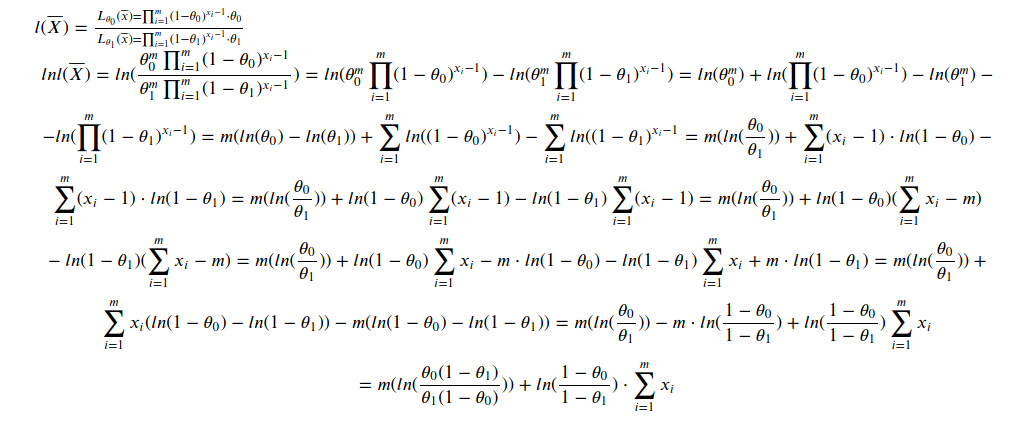

In [12]:
from IPython.display import Image
Image("/home/alexander/Изображения/Снимок экрана от 2020-12-13 21-04-34.png")

## 5.1.4 Вычисление критической области/количества материала

Рассмотрим один из самых сложных вопросов данной контрольной работы — вычисление критической области.  
Для оценки ошибок первого и второго рода по материалу или вычислении необходимого материала при фиксированных ошибках необходимо знать распределение статистики в случае верности гипотезы $H_0$ — $l(X|H_0)$ и в случае верности гипотезы $H_1$ — $l(X|H_1)$. Для большинства распределений это сделать достаточно сложно.  
В случае, если не удается вычислить распределение статистики $l(\overline X)$ в случае верности разных гипотез, предлагается рассмотреть асимптотический подход к различению гипотез.
Прологарифмировав функцию отношения правдоподобия получим сумму одинаково распределенных независимых случайных величин вида
$$z_i = ln \frac{f_1(X_i)}{f_2(X_i)}$$  
Минимальный необходимый объем выборки можно определить из условия $\beta \approx \alpha$

# 5.2 Распределение Максвелла

Рассмотрим две выборки с параметрами $\lambda_1 = 1.0$ и $\lambda_2 = 1.5$    
Сгенерируем новые выборки размеров 10, 100, 1000, 10000. 

In [22]:
# Создание случайной величины с распределением Максвелла, зависящим
# от параметра lambda
lambd=1.5
maxwell_rv=sts.maxwell(scale=lambd)

In [23]:
#Генерация выборки объема n = 10 с lambda = 1.5 с выводом
for n in[10]:
    means__10_=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__10_.append(sample)
        print(sample)

[4.06499115 3.29304662 2.06548589 2.33848089 3.71541966 1.75860818
 3.41498417 4.38362605 2.29142333 1.81028647]
[1.0294253  0.93612595 2.05718965 3.1783249  3.79676811 1.28433721
 0.34984965 2.46719207 3.26624613 2.2698126 ]
[1.83772683 1.19247947 3.0065679  2.30715565 3.31417485 2.05407399
 2.58127034 4.43856895 2.31287785 3.30988034]
[2.2248536  1.50264583 3.63014108 3.56647112 2.72694367 3.16637705
 3.95213014 2.4072889  1.76112722 0.88645207]
[4.13672657 1.70760179 2.90816356 1.67572908 4.83282576 3.27740542
 1.09172339 4.40586677 2.85489081 3.95850891]


In [24]:
#Генерация выборки объема n = 100 с lambda = 1.5 с выводом
for n in[100]:
    means__100_=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100_.append(sample)
        #print(sample)

In [25]:
#Генерация выборки объема n = 1000 с lambda = 1.5 с выводом
for n in[1000]:
    means__1000_=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__1000_.append(sample)
        #print(sample)

In [26]:
#Генерация выборки объема n = 100000 с lambda = 1.5 с выводом
for n in[100000]:
    means__100000_=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100000_.append(sample)
        #print(sample)

In [27]:
#lambda = 1.5
print(means__10_)
#print(means__100_)
#print(means__1000_)
#print(means__100000_)

[array([4.06499115, 3.29304662, 2.06548589, 2.33848089, 3.71541966,
       1.75860818, 3.41498417, 4.38362605, 2.29142333, 1.81028647]), array([1.0294253 , 0.93612595, 2.05718965, 3.1783249 , 3.79676811,
       1.28433721, 0.34984965, 2.46719207, 3.26624613, 2.2698126 ]), array([1.83772683, 1.19247947, 3.0065679 , 2.30715565, 3.31417485,
       2.05407399, 2.58127034, 4.43856895, 2.31287785, 3.30988034]), array([2.2248536 , 1.50264583, 3.63014108, 3.56647112, 2.72694367,
       3.16637705, 3.95213014, 2.4072889 , 1.76112722, 0.88645207]), array([4.13672657, 1.70760179, 2.90816356, 1.67572908, 4.83282576,
       3.27740542, 1.09172339, 4.40586677, 2.85489081, 3.95850891])]


In [15]:
# Создание случайной величины с распределением Максвелла, зависящим
# от параметра lambda
lambd=1.0
maxwell_rv=sts.maxwell(scale=lambd)

In [16]:
#Генерация выборки объема n = 5 с lambda = 1.0 с выводом
for n in[5]:
    means__5=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__5.append(sample)
        print(sample)

[2.14321986 1.18485397 1.59008645 0.66019002 1.76360815]
[2.00976556 0.67772519 2.27467345 1.15765379 1.57802449]
[1.50258044 1.85134318 2.5060473  1.88483168 0.48419799]
[2.74772536 1.64933124 3.20822447 1.39442579 1.86491815]
[1.67158223 2.22617833 2.01937055 0.90596532 1.30132601]


In [17]:
#Генерация выборки объема n = 10 с lambda = 1.0 с выводом
for n in[10]:
    means__10=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__10.append(sample)
        print(sample)

[2.04377128 1.20470993 1.76574532 1.17930732 1.42520709 1.54409342
 1.29846297 1.0102067  1.68055207 1.46540594]
[1.74088016 1.71626588 1.35046643 1.71321742 0.94501546 2.23267041
 1.40417882 1.19008104 1.92007299 1.42497575]
[1.44744564 0.18883212 2.00155411 1.83888184 1.05760485 3.68166889
 1.52330298 0.38261059 1.56205181 1.35009585]
[2.35595376 1.61394674 1.83454666 2.3137414  1.74533823 1.6219218
 1.04613832 1.1481815  2.3435254  2.17161524]
[1.68144504 1.28934166 1.15143359 2.03203627 1.29415021 2.66616337
 1.15623847 0.82980135 1.14220087 0.85857125]


In [18]:
#Генерация выборки объема n = 100 с lambda = 1.0 без вывода
for n in[100]:
    means__100=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100.append(sample)
        #print(sample)

In [19]:
#Генерация выборки объема n = 1000 с lambda = 1.0 без вывода
for n in[1000]:
    means__1000=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__1000.append(sample)
        #print(sample)

In [20]:
#Генерация выборки объема n = 100000 с lambda = 1.0 без вывода
for n in[100000]:
    means__100000=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100000.append(sample)
        #print(sample)

In [21]:
#lambda = 1.0
print(means__10)
#print(means__100)
#print(means__1000)
#print(means__100000)

[array([2.04377128, 1.20470993, 1.76574532, 1.17930732, 1.42520709,
       1.54409342, 1.29846297, 1.0102067 , 1.68055207, 1.46540594]), array([1.74088016, 1.71626588, 1.35046643, 1.71321742, 0.94501546,
       2.23267041, 1.40417882, 1.19008104, 1.92007299, 1.42497575]), array([1.44744564, 0.18883212, 2.00155411, 1.83888184, 1.05760485,
       3.68166889, 1.52330298, 0.38261059, 1.56205181, 1.35009585]), array([2.35595376, 1.61394674, 1.83454666, 2.3137414 , 1.74533823,
       1.6219218 , 1.04613832, 1.1481815 , 2.3435254 , 2.17161524]), array([1.68144504, 1.28934166, 1.15143359, 2.03203627, 1.29415021,
       2.66616337, 1.15623847, 0.82980135, 1.14220087, 0.85857125])]


## 5.2.2 Постановка задачи

$H_0: \xi \sim$ Maxwell $\lambda_1$    
$H_1: \xi \sim$ Maxwell $\lambda_2$

Обозначим как $X_0$ - часть пространства наблюдений такая, что если $x \in X_0$, то следует принять $H_0$, и как $Y_1$ - часть пространства наблюдений такая, что если $x \in X_1$, то следует принять $H_1$. Простым языком, если $x \in X_1$, а на самом деле истинна гипотеза $H_0$, то говорится, что допущена ошибка первого рода. Если с точностью до наоборот - это ошибка второго рода. Вероятность $P_1(X_1)$ отвергнуть гипотезу $H_0$, когда она действительно является ложной, называется мощностью критерия.  
$P(x \in X_1|H_0) = \alpha$ - ошибка 1 рода.  
$P(x \in X_0|H_1) = \beta$ - ошибка 2 рода.  
Функция мощности критерия - функционал на множестве допустимых распределений F и выборке X.
$$W(F) = W(F; X_{1,\alpha}) = P(x \in X_{1,\alpha}|F),$$  
где $P (x \in X_{1,\alpha}|F)$ - вероятность попасть в $X_{1,\alpha}$ , если F - истинная гипотеза. Также  
$$\alpha = sup_{F \in F_0}W(F)$$
$$\beta = sup_{F \in F_1}1 - W(F)$$

## 5.2.3 Вычисление функции отношения правдоподобия.

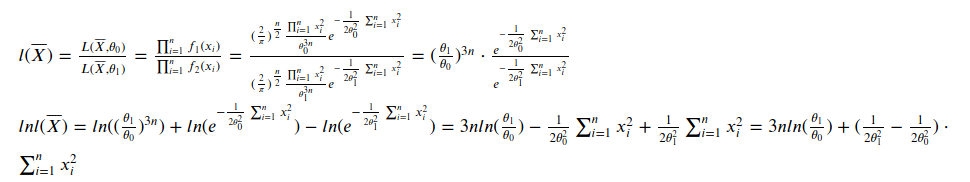

In [28]:
Image("/home/alexander/Изображения/Снимок экрана от 2020-12-13 21-07-36.png")